Mean Squared Error 0.00015009914642182448


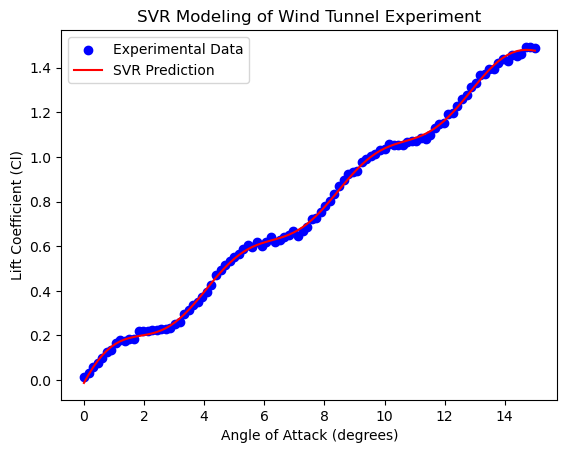

In [4]:
import numpy as np 
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

# Simulate wind tunnel experiment data 
# Angle of attack in degrees from 0 to 15 

alpha = np.linspace(0, 15, 100).reshape(-1,1)

#Lift coefficient is modeled as a base linear trend with added non-linear oscillation to mimic effects such as stall and some guassian noise for experimental error 
Cl = 0.1 * alpha.ravel() + 0.05 * np.sin(1.5 *alpha.ravel()) + np.random.normal(0, 0.01, 100)

# Split data intro training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(alpha, Cl, test_size=0.2, random_state=42)

#Create and train the SVR model 
svr_model = SVR(kernel = 'rbf', C=100, epsilon=0.01)
svr_model.fit(X_train, y_train)

# Evaluate the model and visualize the predictions 

y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error", mse)

plt.scatter(alpha, Cl, color='blue', label='Experimental Data')
plt.plot(alpha, svr_model.predict(alpha), color='red', label='SVR Prediction')
plt.xlabel('Angle of Attack (degrees)')
plt.ylabel('Lift Coefficient (Cl)')
plt.title('SVR Modeling of Wind Tunnel Experiment')
plt.legend()
plt.show()
